# Porównanie dynamiki aktywności szlaków ERK i AKT między liniami komórkowymi o różnych mutacjach. 
Na podstawie wartości ERKKTR_ratio i FoxO3A_ratio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("./data.csv")
metadata = pd.read_csv("./metadata.csv")

In [163]:
# pan Krzychu wyrzucił komórki o mutacji ErbB2 z data.csv, ale chyba zapomniał tego zrobić w metadata.csv
keys  = [mutation for mutation in metadata['Mutation'].unique()]
mutation_distribution = {key : 0 for key in keys}

for mutation in metadata['Mutation']:
    mutation_distribution[mutation] += 1


print("Mutation distribution i metadata: ", mutation_distribution)

Mutation distribution i metadata:  {'WT': 4, 'AKT1_E17K': 4, 'PIK3CA_E545K': 4, 'PIK3CA_H1047R': 4, 'PTEN_del': 8, 'ErbB2': 4}


## Zadanie 1 - porównanie aktywności szlaków sygnałowych między mutacjami

#### a) Średnie przebiegi aktywności dla każdej mutacji w czasie

Elementy pomocnicze do tworzenia DataFrame'ów avg i std:
   1. Kolumna 'Mutation' w pierwotnych danych
   2. Listy do iterowania przy tworzeniu DataFrame'ów
   3. funkcja pomocnicza flatten()

In [3]:
data['Mutation'] = [metadata['Mutation'][site-1] for site in data['Image_Metadata_Site']]

mutations  = list(data['Mutation'].unique())
timepoints = list(data['Image_Metadata_T'].unique())

flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

In [66]:
# Tworzę nowy DataFrame zawierający tylko uśrednione ekspresje


# uśredniam ekspresję ze wszystkich track_id dla danej mutacji, dla danego punktu w czasie
ratakt, raterk = [], []

for mutation in mutations:
    for timepoint in timepoints:
        curr_df = data[data['Mutation'] == mutation][data['Image_Metadata_T'] == timepoint]

        ratakt.append(curr_df['FoxO3A_ratio'].mean())
        raterk.append(curr_df['ERKKTR_ratio'].mean())

    
avg = {'Timepoint': timepoints*len(mutations), 'Mutation': flatten([[mut]*len(timepoints) for mut in mutations]),
      'ratakt': ratakt, 'raterk': raterk}

df_avg = pd.DataFrame(data=avg)
df_avg.to_csv('avg.csv', sep='\t', index=False, header=True)

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/1076265312.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_10686

In [84]:
# Tworzę nowy DataFrame zawierający tylko odchylenie standardowe ekspresji


# agreguję ekspresję ze wszystkich track_id dla danej mutacji, dla danego punktu w czasie
ratakt, raterk = [], []

for mutation in mutations:
    for timepoint in timepoints:
        curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]

        ratakt.append(curr_df['FoxO3A_ratio'].std())
        raterk.append(curr_df['ERKKTR_ratio'].std())
        
std = {'Timepoint': timepoints*len(mutations), 'Mutation': flatten([[mut]*len(timepoints) for mut in mutations]),
      'ratakt': ratakt, 'raterk': raterk}

df_std = pd.DataFrame(data=std)
df_std.to_csv('std.csv', sep='\t', index=False, header=True)

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/3872569079.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_df = df[df['Mutation'] == mutation][df['Image_Metadata_T'] == timepoint]
/tmp/ipykernel_106862/387

In [4]:
df_avg = pd.read_csv("./avg.csv", sep='\t')
df_std = pd.read_csv("./std.csv", sep='\t')

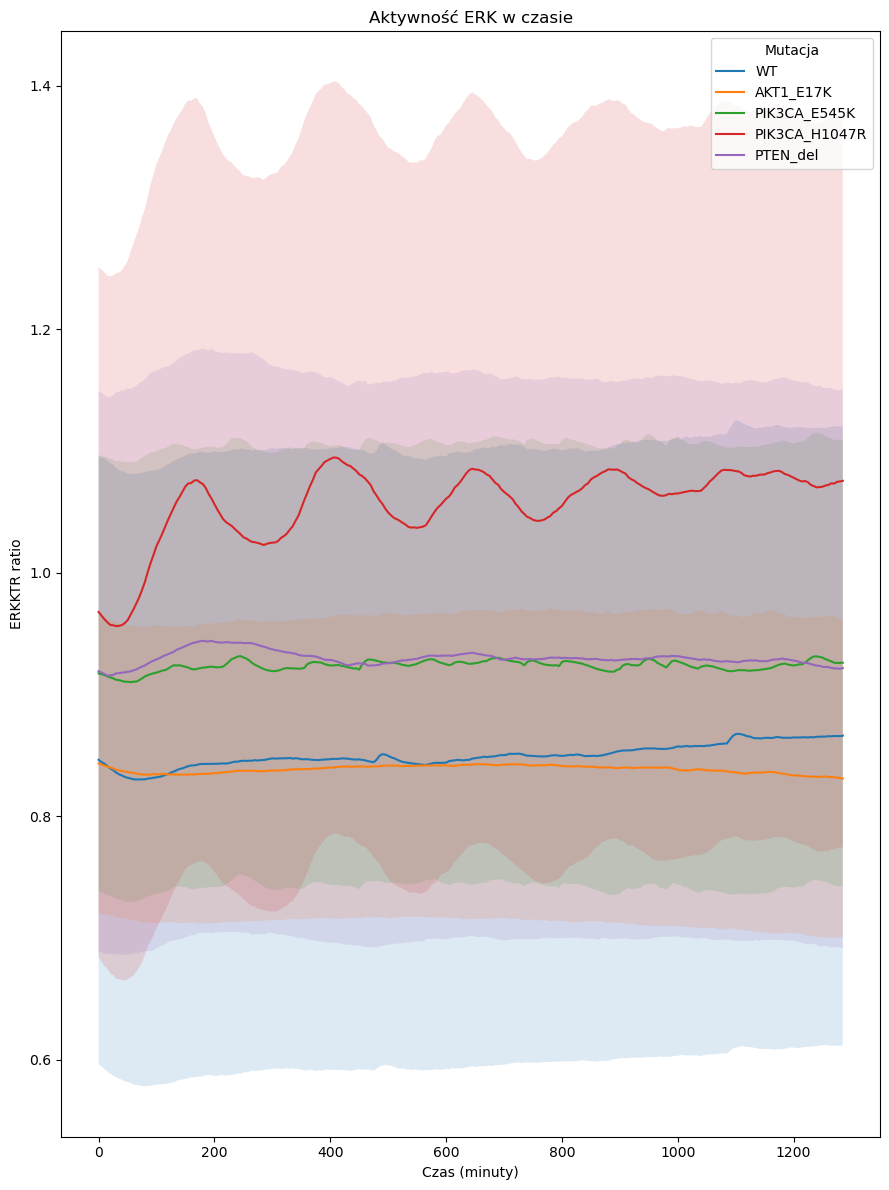

In [5]:
# Wykres mean ± std dla ERK

df_avg['Time_min'] = df_avg['Timepoint'] * 5
df_std['Time_min'] = df_std['Timepoint'] * 5

plt.figure(figsize=(9, 12))
mutations = df_avg['Mutation'].unique()

for mut in mutations:
    # Filter for this mutation
    curr_mean = df_avg[df_avg['Mutation'] == mut]
    curr_std = df_std[df_std['Mutation'] == mut]
        
    # Plot the mean line
    sns.lineplot(x='Time_min', y='raterk', data=curr_mean, label=mut)
    
    # Plot the shaded area (mean ± std)
    plt.fill_between(curr_mean['Time_min'],
                     curr_mean['raterk'] - curr_std['raterk'],
                     curr_mean['raterk'] + curr_std['raterk'],
                     alpha=0.15)

plt.title("Aktywność ERK w czasie")
plt.xlabel("Czas (minuty)")
plt.ylabel("ERKKTR ratio")
plt.legend(title='Mutacja')
plt.tight_layout()
plt.show()

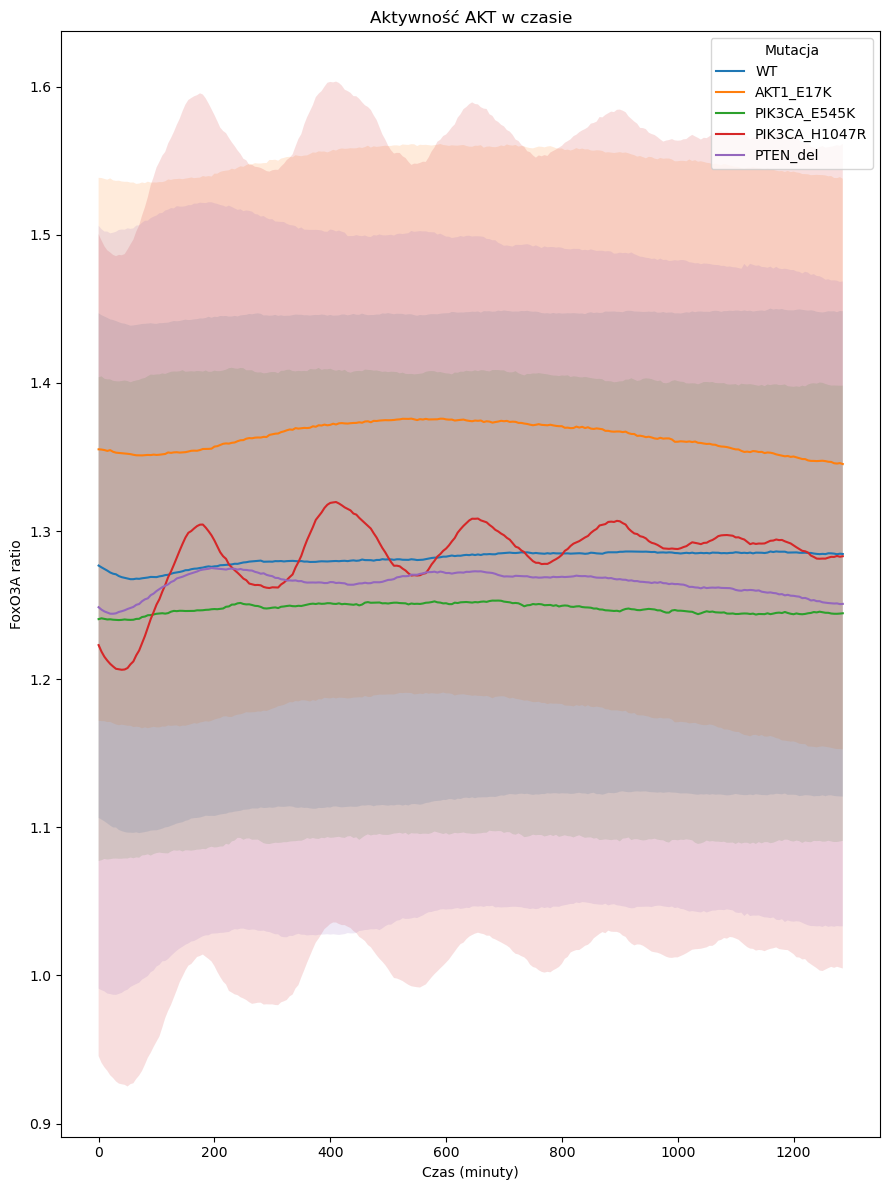

In [14]:
# Wykres mean ± std dla AKT

df_avg['Time_min'] = df_avg['Timepoint'] * 5
df_std['Time_min'] = df_std['Timepoint'] * 5

plt.figure(figsize=(9, 12))

for mut in mutations:
    # Filter for this mutation
    curr_mean = df_avg[df_avg['Mutation'] == mut]
    curr_std = df_std[df_std['Mutation'] == mut]
        
    # Plot the mean line
    sns.lineplot(x='Time_min', y='ratakt', data=curr_mean, label=mut)
    
    # Plot the shaded area (mean ± std)
    plt.fill_between(curr_mean['Time_min'],
                     curr_mean['ratakt'] - curr_std['ratakt'],
                     curr_mean['ratakt'] + curr_std['ratakt'],
                     alpha=0.15)

plt.title("Aktywność AKT w czasie")
plt.xlabel("Czas (minuty)")
plt.ylabel("FoxO3A ratio")
plt.legend(title='Mutacja')
plt.tight_layout()
plt.show()


#### b) Interpretacja zaobserwowanych różnic

O tym można przeczytać w raporcie :)

#### c) Testy istotności statystycznej porównujące poziomy ERK i AKT

Zdecydowano się na porównanie szczepu dzikiego (WT) parami z każdą z pozostałych mutacji testem Manna-Whitneya, ze względu na wielkorotne testowanie, zastosowano również korektę Bonferroniego.

Wykonano testy statystyczne Krulskala-Wallisa i Manna-Whitey'a na poziomach ekspresji EKR i AKT w celu sprawdzenia czy poziomy odpowiadające różnym mutacjom pochodzą z różnych rozkładów. W celu wykonania testów przeprowadzono następujące transformacje danych:

<ol>
  <li>Dodano pomocniczą kolumnę 'cell_id'</li>
  <li>Uśredniono ekspresję danego markera w danej komórce po wszystkich punktach czasowych (w zdefiniowanym oknie)</li>
  <li>Wektor uśrednionych po czasie ekspresji danego markera ze wszystkich komórek o danej mutacji był bazą dla testów statystycznych
        <ul>
            <li>Kruskala-Wallisa, aby sprawdzić czy któryś wektor pochodzi z innego rozkładu niż pozostałe</li>
            <li>wielokrotny test Manna-Whitey'a, w celu sprawdzenia, które konkretnie mutacje odpiegają w istotny sposób od WT</li>
        </ul>
    </li>
</ol> 


[comment]: <> (This is a comment, it will not be included)


Poniżej zostawiłem część procesu konstruowania kolumny 'cell_id'.

In [11]:
# czy cell_id powinno jeszcze zależeć od czegoś oprócz Exp_ID i track_id?
data[['Exp_ID', 'track_id', 'Image_Metadata_T']]

,Exp_ID,track_id,Image_Metadata_T
0,1,1,0
1,1,1,1
2,1,1,2
3,1,1,3
4,1,1,4
...,...,...,...
35541643,6,1372,253
35541644,6,1372,254
35541645,6,1372,255
35541646,6,1372,256


In [12]:
# Sprawdzam, czy cell_id, który chcę dodać może zależeć tylko od Exp_ID i track_id
case1 = set(zip(data['Exp_ID'],data['track_id'],data['Image_Metadata_T']))
len(case1)

4255723

In [13]:
# Niestety, taki identyfikator nie jest uniaklny
35541648/4255723

8.351494681397263

In [14]:
# Jak się okazuje, do cell_id potrzebny jest jeszcze Image_Metedata_Site
case2 = set(zip(data['Exp_ID'],data['track_id'],data['Image_Metadata_T'],data['Image_Metadata_Site']))
len(case2)

35541648

In [15]:
35541648/35541648

1.0

In [4]:
# dodaję kolumnę cell_id do danych

unique_triads = list(set(zip(data['Exp_ID'], data['track_id'], data['Image_Metadata_Site']))) 
# powtórki są w tym zipie dlatego, że trójki (Exp_ID, track_id, Site) powtarzają się pomiędzy timepointami

pom = {triad:idx for idx, triad in enumerate(unique_triads)}

data['cell_id'] =  [pom[triad] for triad in zip(data['Exp_ID'], data['track_id'], data['Image_Metadata_Site'])]


In [8]:
display(data)
# skutkiem korzystania z set() jest pomieszana kolejność cell_id
# ale każda komórka ma swoje unikalne cell_id, więc nie ma tego złego

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y,cell_id,ERK_zscore,Active
0,5,6,157,0,329.001,0.861288,0.990602,984.881,451.16700,0,0.584492,False
1,5,6,157,1,334.001,0.851745,0.985673,986.228,450.29900,0,0.403746,False
2,5,6,157,2,333.999,0.848685,0.977396,985.769,449.78700,0,0.345790,False
3,5,6,157,3,332.000,0.852266,1.000190,985.690,451.00000,0,0.413614,False
4,5,6,157,4,325.001,0.838614,0.980341,986.502,451.27700,0,0.155044,False
...,...,...,...,...,...,...,...,...,...,...,...,...
35541643,2,11,2364,139,113.000,0.794819,1.139120,781.973,3.42478,196908,-1.181114,False
35541644,2,11,2364,140,108.000,0.802324,1.203800,781.435,3.37963,196908,-0.731556,False
35541645,2,11,2364,141,109.000,0.810602,1.188890,781.560,3.29358,196908,-0.235695,False
35541646,2,11,2364,142,100.000,0.821394,1.181600,781.150,2.98000,196908,0.410758,False


Definiujemy początek i koniec okna czasowego:

In [5]:
start = 60
stop = 180

data_window = data[(data['Image_Metadata_T']>=start//5) & (data['Image_Metadata_T']<=stop//5)]


In [6]:
# Uśredniam ekspresję obu białek po czasie DLA DANEJ KOMÓRKI w zdefiniowanym oknie czasowym

rows = []

unique_cells = data_window['cell_id'].unique()

for cid in unique_cells:
    
    cell_data = data_window[data_window['cell_id'] == cid]
    
    mean_ratakt = cell_data['FoxO3A_ratio'].mean()
    mean_raterk = cell_data['ERKKTR_ratio'].mean()
    
    # Get the mutation (should be the same across all rows)
    mutation = cell_data['Mutation'].iloc[0]
    

    rows.append({
        'cell_id': cid,
        'ratakt': mean_ratakt,
        'raterk': mean_raterk,
        'Mutation': mutation
    })

avg_per_cell = pd.DataFrame(rows).sort_values(by='cell_id').reset_index(drop=True)

avg_per_cell.to_csv('avg_per_cell.csv', sep='\t', index=False, header=True)


In [5]:
avg_per_cell = pd.read_csv("./avg_per_cell.csv", sep='\t')

In [11]:
display(avg_per_cell)
# tutaj jest mniej komórek niż wskazywałby na to najwyższy id, ale to nie jest błąd w kodzie
# przy uśrednianiu komórek po całym przedziale czasu nie ma tego problemu
# po prostu niektóre komórki wypadają z okna

,cell_id,ratakt,raterk,Mutation
0,0,1.006450,0.825426,AKT1_E17K
1,1,1.344219,0.805921,PIK3CA_H1047R
2,2,1.302829,0.852093,PIK3CA_E545K
3,3,1.216148,0.959575,PIK3CA_E545K
4,4,1.656331,0.872388,AKT1_E17K
...,...,...,...,...
144511,196902,1.297884,1.037095,PIK3CA_E545K
144512,196903,1.251342,0.455495,WT
144513,196904,1.280990,1.076638,PTEN_del
144514,196905,1.608896,1.086063,PIK3CA_H1047R


In [21]:
# Categorical pomaga zachować taką kolejność mutacji jak na poprzednich wykresach
avg_per_cell['Mutation'] = pd.Categorical(avg_per_cell['Mutation'], categories=mutations, ordered=True)
avg_per_cell = avg_per_cell.sort_values(by='Mutation')


display(avg_per_cell)

,cell_id,ratakt,raterk,Mutation
26824,36575,1.189672,0.563198,WT
103555,141040,1.293022,1.022122,WT
103556,141041,1.398271,0.876426,WT
70401,95904,1.311911,0.854382,WT
103562,141048,0.965663,0.672540,WT
...,...,...,...,...
103405,140841,0.955866,1.059245,PTEN_del
103406,140842,1.190458,0.838239,PTEN_del
78919,107503,1.391671,1.187242,PTEN_del
11462,15644,0.628666,0.889228,PTEN_del


##### Test Kruskala-Wallisa dla uśrednionych ekspresji AKT

In [7]:
from scipy.stats import kruskal

grouped_data = []

for mut in mutations:
    group_df = avg_per_cell[avg_per_cell['Mutation'] == mut]['ratakt']
    grouped_data.append(group_df)
    
h_stat, p_val = kruskal(*grouped_data)
print(f"Kruskal–Wallis H = {h_stat}, p = {p_val}")

Kruskal–Wallis H = 7742.514239486756, p = 0.0


Z testu K-W wyszło, że przynajmniej jedna klasa pochodzi z innego rozkładu. Aby zbadać dokładniej, które klasy się od siebie różnią wykonano parami test Manna-Whitney'a między WT a pozostałymi mutacjami

In [10]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests


wt_values = avg_per_cell[avg_per_cell['Mutation'] == 'WT']['ratakt'].dropna()

# Get all other mutation types (excluding WT)
mutations_to_test = [m for m in avg_per_cell['Mutation'].unique() if m != 'WT']

results = []

for mut in mutations_to_test:
    mut_values = avg_per_cell[avg_per_cell['Mutation'] == mut]['ratakt'].dropna()
    
    # Perform two-sided Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(wt_values, mut_values, alternative='two-sided')
    
    results.append({
        'Mutation': mut,
        'U_stat': u_stat,
        'p_value': p_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Correct for multiple comparisons using Bonferroni
results_df['p_adj'] = multipletests(results_df['p_value'], method='bonferroni')[1]
results_df['Significant'] = results_df['p_adj'] < 0.05

# Optional: sort for clarity
results_df = results_df.sort_values(by='p_adj')

# Display the results
display(results_df)


,Mutation,U_stat,p_value,p_adj,Significant
0,AKT1_E17K,392649178.5,0.000000e+00,0.000000e+00,True
2,PIK3CA_E545K,611300621.5,1.905976e-118,7.623906e-118,True
1,PIK3CA_H1047R,325795432.5,9.887731e-10,3.955092e-09,True
3,PTEN_del,367240844.5,2.729451e-03,1.091781e-02,True


##### Test Kruskala-Wallisa dla uśrednionych ekspresji ERK

In [8]:
grouped_data = []

for mut in mutations:
    group_df = avg_per_cell[avg_per_cell['Mutation'] == mut]['raterk']
    grouped_data.append(group_df)
    
h_stat, p_val = kruskal(*grouped_data)
print(f"Kruskal–Wallis H = {h_stat}, p = {p_val}")

Kruskal–Wallis H = 15815.032350478721, p = 0.0


Tak samo jak w przypadku AKT, wynik testu Kruskala-Wallisa zasugerował konieczność dodatkowych testów

In [11]:
results = []

for mut in mutations_to_test:
    mut_values = avg_per_cell[avg_per_cell['Mutation'] == mut]['raterk'].dropna()
    
    # Perform two-sided Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(wt_values, mut_values, alternative='two-sided')
    
    results.append({
        'Mutation': mut,
        'U_stat': u_stat,
        'p_value': p_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Correct for multiple comparisons using Bonferroni
results_df['p_adj'] = multipletests(results_df['p_value'], method='bonferroni')[1]
results_df['Significant'] = results_df['p_adj'] < 0.05

# Optional: sort for clarity
results_df = results_df.sort_values(by='p_adj')

# Display the results
display(results_df)


,Mutation,U_stat,p_value,p_adj,Significant
0,AKT1_E17K,1.083788e+09,0.0,0.0,True
1,PIK3CA_H1047R,4.963474e+08,0.0,0.0,True
2,PIK3CA_E545K,1.029544e+09,0.0,0.0,True
3,PTEN_del,6.458919e+08,0.0,0.0,True


## Zadanie 2 - analiza koordynacji przestrzennej i dynamiki sygnału

##### a) Definicja stanu aktywnego komórki

Dla każdej komórki, w każdym punkcie czasowym wyliczasny jest $z_{score}$ zdefiniowany jako:

$$
z_{i,t} = \frac{x_{i,t} - \mu_i}{\sigma_i}
$$

Gdzie:

- $x_{i,t}$ jest sygnałem ERK komórki $i$ w czasie $t$
- $\mu_i$  jest średnim sygnałem ERK komórki $i$ w czasie
- $\sigma_i$  jest odchyleniem standardowym sygnału ERK komórki $i$ w czasie


Komórka jest uznawana za aktywną w chwili *t* gdy odpowiadający jej $z_{score}$ przekracza pewien zdefiniowany próg: $z_{i,t} > threshold$


In [7]:
# Wyliczanie z-score

def compute_cellwise_z(df):
    mu = df['ERKKTR_ratio'].mean()
    sigma = df['ERKKTR_ratio'].std()
    df['ERK_zscore'] = (df['ERKKTR_ratio'] - mu) / sigma
    return df

data = data.groupby('cell_id').apply(compute_cellwise_z).reset_index(drop=True)

In [8]:
threshold = 0.75

data['Active'] = data['ERK_zscore'] > threshold

##### b) Liczba aktywnych komórek i ich aktywnych sąsiadów

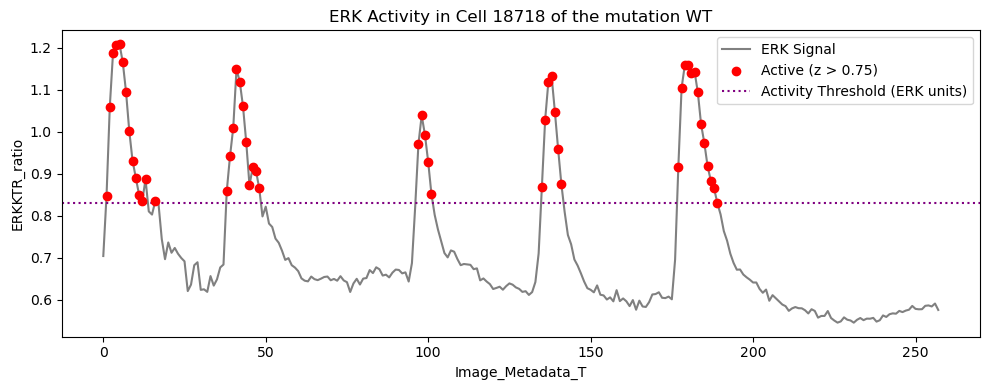

In [161]:
# SANITY CHECK: wybór losowej komórki i wykres jej aktywności

example_cell_id = data['cell_id'][random.randint(0, 35541648 - 1)]


cell_df = data[data['cell_id'] == example_cell_id].sort_values(by='Image_Metadata_T')

mut = cell_df['Mutation'].unique()[0]

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(cell_df['Image_Metadata_T'], cell_df['ERKKTR_ratio'],
         label='ERK Signal', color='gray', lw=1.5)

plt.scatter(cell_df[cell_df['Active']]['Image_Metadata_T'],
            cell_df[cell_df['Active']]['ERKKTR_ratio'],
            color='red', label=f'Active (z > {threshold:.2f})', zorder=5)

# Optional: draw the approximate threshold line in ERK units
threshold_erk = cell_df[cell_df['Active']]['ERKKTR_ratio'].min()
plt.axhline(threshold_erk, color='purple', linestyle=':', label='Activity Threshold (ERK units)')

# Labels and legend
plt.title(f"ERK Activity in Cell {example_cell_id} of the mutation {mut}")
plt.xlabel("Image_Metadata_T")
plt.ylabel("ERKKTR_ratio")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
import time
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# CONFIG
radius = 50 # μm neighborhood radius
max_workers = 12

In [174]:
# Funkcja licząca akywnych sąsiadów w czasie t
def process_frame(t):
    frame = data[data['Image_Metadata_T']==t].copy()
    recs = []
    for (_, _), site_df in frame.groupby(['Exp_ID','Image_Metadata_Site']):
        coords = site_df[['objNuclei_Location_Center_X','objNuclei_Location_Center_Y']].values
        tree   = KDTree(coords)
        act    = site_df['Active'].values
        for i,row in site_df.iterrows():
            idx   = site_df.index.get_loc(i)
            nbrs  = [j for j in tree.query_ball_point(coords[idx], r=radius) if j!=idx]
            n_act = int(np.sum(act[nbrs]))
            recs.append({
                'Timepoint': t,
                'Mutation':  row['Mutation'],
                'Active_Neighbors': n_act
            })
    return pd.DataFrame(recs)



# Faktyczne obliczenie
timepoints = sorted(data['Image_Metadata_T'].unique())
start = time.time()
with ProcessPoolExecutor(max_workers=max_workers) as ex:
    df2b = pd.concat(
        tqdm(ex.map(process_frame, timepoints),
             total=len(timepoints),
             desc="Task 2b: neighbor counts"),
        ignore_index=True
    )
print("Task 2b in", time.time()-start, "s")

agg2b = df2b.groupby(['Timepoint','Mutation'])['Active_Neighbors'] \
            .mean().reset_index(name='Avg_Active_Neighbors')

Task 2b: neighbor counts: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 258/258 [03:59<00:00,  1.08it/s]


Task 2b in 241.67576813697815 s


In [181]:
# Categorical pomaga zachować taką kolejność mutacji jak na poprzednich wykresach
agg2b['Mutation'] = pd.Categorical(agg2b['Mutation'], categories=mutations, ordered=True)
agg2b = agg2b.sort_values(by='Mutation')

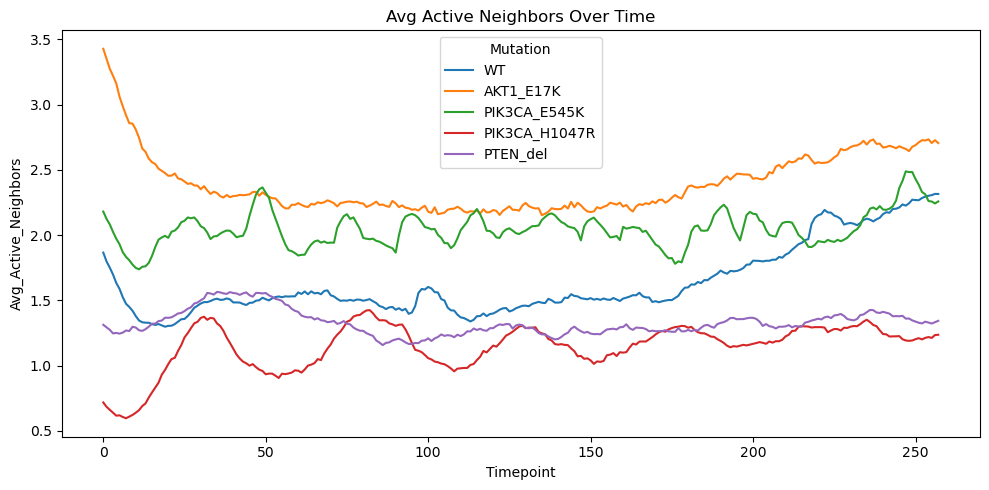

In [176]:
plt.figure(figsize=(10,5))
sns.lineplot(data=agg2b, x='Timepoint', y='Avg_Active_Neighbors',
             hue='Mutation')
plt.title("Avg Active Neighbors Over Time")
plt.tight_layout()
plt.show()

In [11]:
# Wykres liczby sąsiadów w czasie:

def process_frame2(t):
    frame = data[data['Image_Metadata_T']==t].copy()
    recs = []
    for (_, _), site_df in frame.groupby(['Exp_ID','Image_Metadata_Site']):
        coords = site_df[['objNuclei_Location_Center_X','objNuclei_Location_Center_Y']].values
        tree   = KDTree(coords)
        for i,row in site_df.iterrows():
            idx   = site_df.index.get_loc(i)
            n_nbrs  = len([j for j in tree.query_ball_point(coords[idx], r=radius) if j!=idx])
            recs.append({
                'Timepoint': t,
                'Mutation':  row['Mutation'],
                'Neighbors': n_nbrs
            })
    return pd.DataFrame(recs)



# Faktyczne obliczenie
start = time.time()
with ProcessPoolExecutor(max_workers=max_workers) as ex:
    df2b = pd.concat(
        tqdm(ex.map(process_frame2, timepoints),
             total=len(timepoints),
             desc="All neighbor counts"),
        ignore_index=True
    )
print("All neighbors counted in: ", time.time()-start, "s")

agg2b = df2b.groupby(['Timepoint','Mutation'])['Neighbors'] \
            .mean().reset_index(name='Avg_Neighbors')

All neighbor counts: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 258/258 [03:48<00:00,  1.13it/s]


All neighbors counted in:  229.68421840667725 s


In [12]:
# Categorical pomaga zachować taką kolejność mutacji jak na poprzednich wykresach
agg2b['Mutation'] = pd.Categorical(agg2b['Mutation'], categories=mutations, ordered=True)
agg2b = agg2b.sort_values(by='Mutation')

In [15]:
display(agg2b)

,Timepoint,Mutation,Avg_Neighbors
644,128,WT,8.652684
604,120,WT,8.655381
599,119,WT,8.658854
594,118,WT,8.667365
589,117,WT,8.671595
...,...,...,...
283,56,PTEN_del,5.936558
48,9,PTEN_del,5.901403
1048,209,PTEN_del,6.099298
1058,211,PTEN_del,6.100808


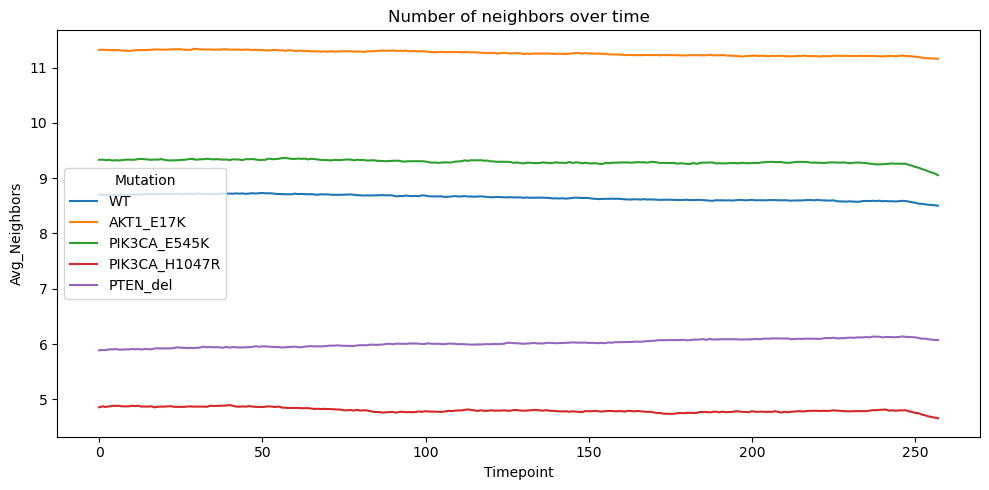

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data=agg2b, x='Timepoint', y='Avg_Neighbors',
             hue='Mutation')
plt.title("Number of neighbors over time")
plt.tight_layout()
plt.show()

##### c) Badanie rozprzestrzeniania się aktywności sygnałowej

Za metodę analizy stopnia skoordynowania rozprzestrzeniania się aktywności sygnałowej wybrano analizę (animowanych) map aktywności komórkowej na płaszczyźnie XY.

Dla każdej mutacji wykonano jeden gif - na podstawie pierwszego napotkanego eksperymentu dotyczącego rzeczonej mutacji

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

def create_activity_gif(df, exp_id, site, mutation_name, output_dir='gifs', fps=20):
    subset = df[
        (df['Exp_ID'] == exp_id) &
        (df['Image_Metadata_Site'] == site)
    ].copy()

    if subset.empty:
        print(f"No data for Exp_ID={exp_id}, Site={site}")
        return

    timepoints = sorted(subset['Image_Metadata_T'].unique())
    frames = []

    for t in timepoints:
        df_t = subset[subset['Image_Metadata_T'] == t]

        x_in = df_t.loc[~df_t['Active'], 'objNuclei_Location_Center_X']
        y_in = df_t.loc[~df_t['Active'], 'objNuclei_Location_Center_Y']
        x_ac = df_t.loc[ df_t['Active'], 'objNuclei_Location_Center_X']
        y_ac = df_t.loc[ df_t['Active'], 'objNuclei_Location_Center_Y']

        fig, ax = plt.subplots(figsize=(6,6))
        ax.scatter(x_in, y_in, c='grey', s=10, alpha=0.6, label='Inactive')
        ax.scatter(x_ac, y_ac, c='red',  s=10, alpha=0.8, label='Active')

        ax.set_xlim(0, 1024)
        ax.set_ylim(0, 1024)
        ax.set_xlabel("X Position (µm)")
        ax.set_ylabel("Y Position (µm)")
        ax.set_title(f"{mutation_name} — Exp {exp_id}, Site {site} — Time: {t * 5} min")
        ax.legend(loc='upper right', fontsize=8)
        plt.tight_layout()

        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        h, w = fig.canvas.get_width_height()
        frames.append(img.reshape(h, w, 3))
        plt.close(fig)

    os.makedirs(output_dir, exist_ok=True)
    fname = f"{mutation_name.replace('/', '_')}_Exp{exp_id}_Site{site}.gif"
    gif_path = os.path.join(output_dir, fname)
    imageio.mimsave(gif_path, frames, fps=fps)
    print(f"Saved {gif_path}")


# Now generate one GIF per mutation using the first available (Exp_ID, Site)
mutation_to_example = data.groupby('Mutation')[['Exp_ID', 'Image_Metadata_Site']].first().reset_index()

for _, row in mutation_to_example.iterrows():
    create_activity_gif(
        df=data,
        exp_id=row['Exp_ID'],
        site=row['Image_Metadata_Site'],
        mutation_name=row['Mutation']
    )

Saved gifs/AKT1_E17K_Exp5_Site6.gif
Saved gifs/PIK3CA_E545K_Exp4_Site10.gif
Saved gifs/PIK3CA_H1047R_Exp2_Site16.gif
Saved gifs/PTEN_del_Exp6_Site21.gif
Saved gifs/WT_Exp5_Site1.gif


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

def create_activity_gif(df, exp_id, site, mutation_name, output_dir='gifs', fps=20):
    subset = df[
        (df['Exp_ID'] == exp_id) &
        (df['Image_Metadata_Site'] == site)
    ].copy()

    if subset.empty:
        print(f"No data for Exp_ID={exp_id}, Site={site}")
        return

    timepoints = sorted(subset['Image_Metadata_T'].unique())
    frames = []

    os.makedirs(output_dir, exist_ok=True)  # Moved here so it's available for PNG too

    for idx, t in enumerate(timepoints):  # 🔹 Added index tracking
        df_t = subset[subset['Image_Metadata_T'] == t]

        x_in = df_t.loc[~df_t['Active'], 'objNuclei_Location_Center_X']
        y_in = df_t.loc[~df_t['Active'], 'objNuclei_Location_Center_Y']
        x_ac = df_t.loc[ df_t['Active'], 'objNuclei_Location_Center_X']
        y_ac = df_t.loc[ df_t['Active'], 'objNuclei_Location_Center_Y']

        fig, ax = plt.subplots(figsize=(6,6))
        ax.scatter(x_in, y_in, c='grey', s=10, alpha=0.6, label='Inactive')
        ax.scatter(x_ac, y_ac, c='red',  s=10, alpha=0.8, label='Active')

        ax.set_xlim(0, 1024)
        ax.set_ylim(0, 1024)
        ax.set_xlabel("X Position (µm)")
        ax.set_ylabel("Y Position (µm)")
        ax.set_title(f"{mutation_name} — Exp {exp_id}, Site {site} — Time: {t * 5} min")
        ax.legend(loc='upper right', fontsize=8)
        plt.tight_layout()

        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        h, w = fig.canvas.get_width_height()
        frame = img.reshape(h, w, 3)
        frames.append(frame)

        # 🔹 Save the first frame as PNG
        if idx == 0:
            png_name = f"{mutation_name.replace('/', '_')}_Exp{exp_id}_Site{site}_frame0.png"
            png_path = os.path.join(output_dir, png_name)
            imageio.imwrite(png_path, frame)
            print(f"Saved first frame to {png_path}")

        plt.close(fig)

    fname = f"{mutation_name.replace('/', '_')}_Exp{exp_id}_Site{site}.gif"
    gif_path = os.path.join(output_dir, fname)
    imageio.mimsave(gif_path, frames, fps=fps)
    print(f"Saved {gif_path}")
    
    
# Now generate one GIF per mutation using the first available (Exp_ID, Site)
mutation_to_example = data.groupby('Mutation')[['Exp_ID', 'Image_Metadata_Site']].first().reset_index()

for _, row in mutation_to_example.iterrows():
    create_activity_gif(
        df=data,
        exp_id=row['Exp_ID'],
        site=row['Image_Metadata_Site'],
        mutation_name=row['Mutation']
    )

Saved first frame to gifs/AKT1_E17K_Exp5_Site6_frame0.png
Saved gifs/AKT1_E17K_Exp5_Site6.gif
Saved first frame to gifs/PIK3CA_E545K_Exp4_Site10_frame0.png
Saved gifs/PIK3CA_E545K_Exp4_Site10.gif
Saved first frame to gifs/PIK3CA_H1047R_Exp2_Site16_frame0.png
Saved gifs/PIK3CA_H1047R_Exp2_Site16.gif
Saved first frame to gifs/PTEN_del_Exp6_Site21_frame0.png
Saved gifs/PTEN_del_Exp6_Site21.gif
Saved first frame to gifs/WT_Exp5_Site1_frame0.png
Saved gifs/WT_Exp5_Site1.gif


# ZADANIE 3

## 3.1 Sprawdzamy czy występuje "efekt falowy"
Poniżej znajduje się kod generujący wykresy skrzypcowe rozkładów $ERK_{ratio}$ sąsiadów komórek aktywnych w momencie aktywacji tychże komórek, jak również przed i po aktywacji

In [169]:
# 1) Extract all rising-edge events across cells
start = time.time()

event_records = []
for cid, cell_df in data.groupby('cell_id'):
    cell_df = cell_df.sort_values('Image_Metadata_T')
    active = cell_df['Active'].values
    times  = cell_df['Image_Metadata_T'].values
    exp_id, site = cell_df[['Exp_ID','Image_Metadata_Site']].iloc[0]
    for i in range(1, len(times)):
        if not active[i-1] and active[i]:
            event_records.append({
                'cell_id': cid,
                'Exp_ID': exp_id,
                'Image_Metadata_Site': site,
                't0': times[i],
                'Mutation': cell_df['Mutation'].iloc[0]
            })

events_df = pd.DataFrame(event_records)

print(f"Extracted {len(events_df)} activation events in {time.time()-start} seconds")

Extracted 1227271 activation events in 108.73044013977051 seconds


In [171]:
downsample_factor = 50

# 2) Downsample the event list
n_events = len(events_df)
keep_n = max(1, n_events // downsample_factor)
sampled_events = events_df.sample(n=keep_n, random_state=42).reset_index(drop=True)

print(f"Total events: {n_events}, processing downsampled: {keep_n}")

# 3) Define a per-event processor
def process_event(evt):
    cid   = evt['cell_id']
    exp   = evt['Exp_ID']
    site  = evt['Image_Metadata_Site']
    t0    = evt['t0']
    mut   = evt['Mutation']

    # Subset the group once
    grp = data[
        (data['Exp_ID'] == exp) & 
        (data['Image_Metadata_Site'] == site)
    ].set_index('Image_Metadata_T')

    # Build one KDTree at t0
    if t0 not in grp.index:
        return pd.DataFrame([], columns=['rel_time', 'ERKKTR_ratio', 'Mutation'])

    base = grp.loc[t0]
    coords0 = base[['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y']].values
    tree0 = KDTree(coords0)

    # Find the focal cell’s index at t0
    idxs = np.where(base['cell_id'] == cid)[0]
    if len(idxs) == 0:
        return pd.DataFrame([], columns=['rel_time', 'ERKKTR_ratio', 'Mutation'])
    idx0 = idxs[0]

    # Neighbors of that point at t0
    neighbor_ids = base.iloc[
        [j for j in tree0.query_ball_point(coords0[idx0], r=radius) if j != idx0]
    ]['cell_id'].tolist()

    # Collect ERK at t0-1, t0, t0+1 using same neighbor cell_ids
    rows = []
    for dt, label in [(-1, 'before'), (0, 'event'), (1,'after')]:
        t = t0 + dt
        if t not in grp.index:
            continue
        df_t = grp.loc[t]
        neighbors = df_t[df_t['cell_id'].isin(neighbor_ids)]
        for _, row in neighbors.iterrows():
            rows.append({
                'rel_time': label,
                'ERKKTR_ratio': row['ERKKTR_ratio'],
                'Mutation': mut
            })

    return pd.DataFrame(rows)

# 4) Process sampled events in parallel
start = time.time()
with ProcessPoolExecutor(max_workers=max_workers) as ex:
    dfs = list(tqdm(ex.map(process_event, sampled_events.to_dict('records')),
                    total=len(sampled_events),
                    desc="Task 2c (downsampled)"))
df2c = pd.concat(dfs, ignore_index=True)
print("2c downsampled in", time.time() - start, "s")


Total events: 1227271, processing downsampled: 24545


Task 2c (downsampled): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24545/24545 [13:04<00:00, 31.29it/s]


2c downsampled in 793.1101980209351 s


In [185]:
# Categorical pomaga zachować taką kolejność mutacji jak na poprzednich wykresach
df2c['Mutation'] = pd.Categorical(df2c['Mutation'], categories=mutations, ordered=True)
df2c = df2c.sort_values(by='Mutation')

,rel_time,ERKKTR_ratio,Mutation
319992,event,1.000920,WT
123991,event,1.193850,WT
270871,after,1.071610,WT
124005,after,0.728714,WT
124006,after,0.774958,WT
...,...,...,...
197782,after,1.260980,PTEN_del
198171,after,1.283760,PTEN_del
527578,event,0.886052,PTEN_del
527597,event,0.746589,PTEN_del


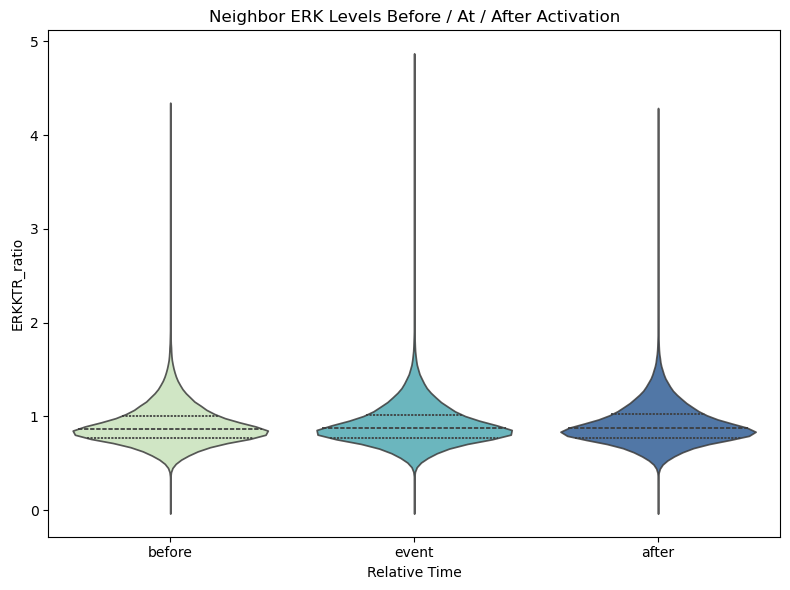

In [236]:
# Główny wykres skrzypcowy dla wszystkiego 
# YlGnBu, RdPu
palette = dict(zip(['before', 'event', 'after'], sns.color_palette("YlGnBu", 3)))

plt.figure(figsize=(8,6))
sns.violinplot(
    data=df2c, x='rel_time', y='ERKKTR_ratio',
    order=['before', 'event', 'after'],
    inner='quartile', palette=palette, hue='rel_time', alpha=0.85
)
plt.title("Neighbor ERK Levels Before / At / After Activation")
plt.xlabel("Relative Time")
plt.ylabel("ERKKTR_ratio")
plt.tight_layout()
plt.show()

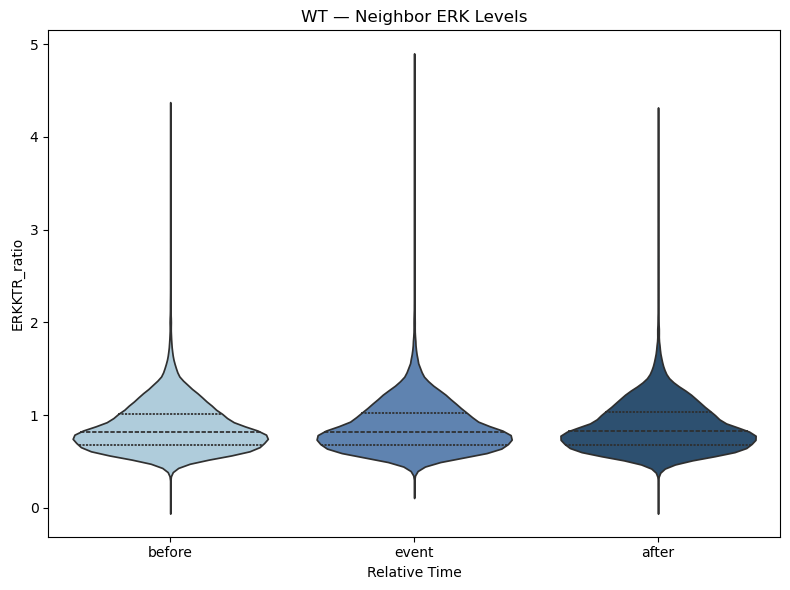

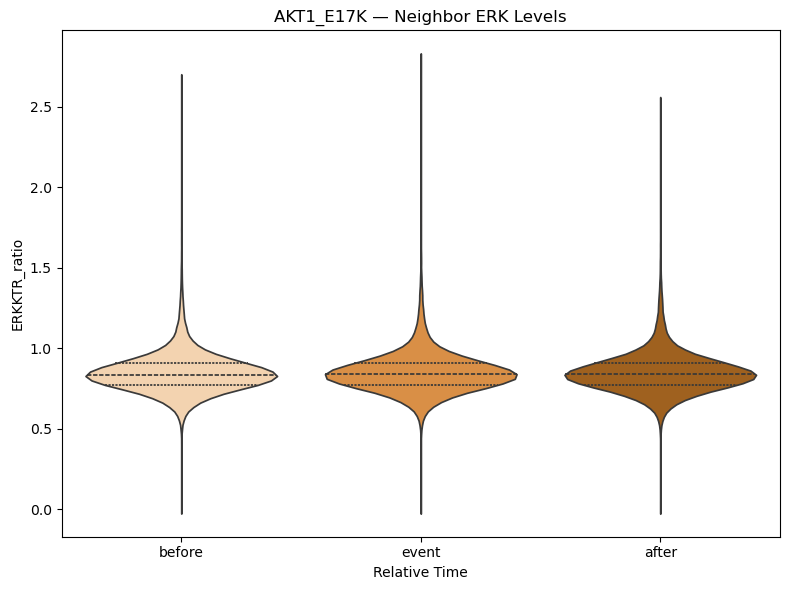

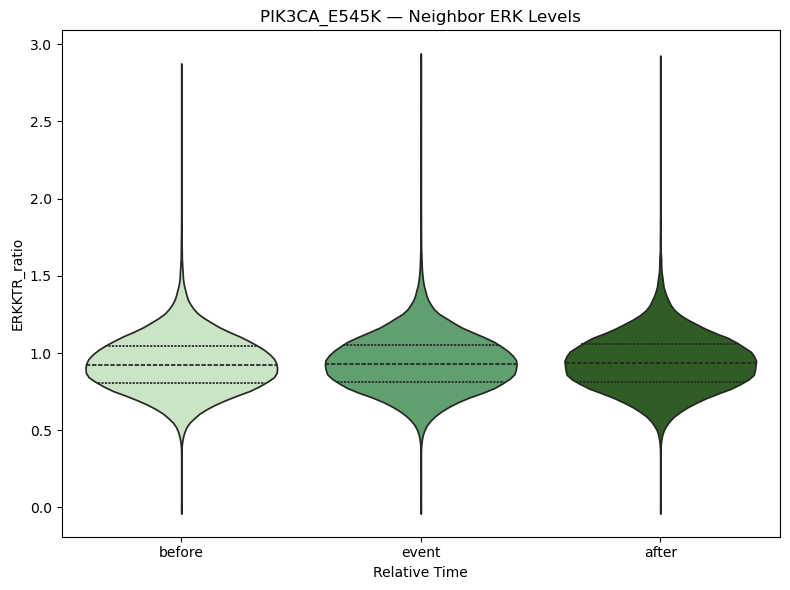

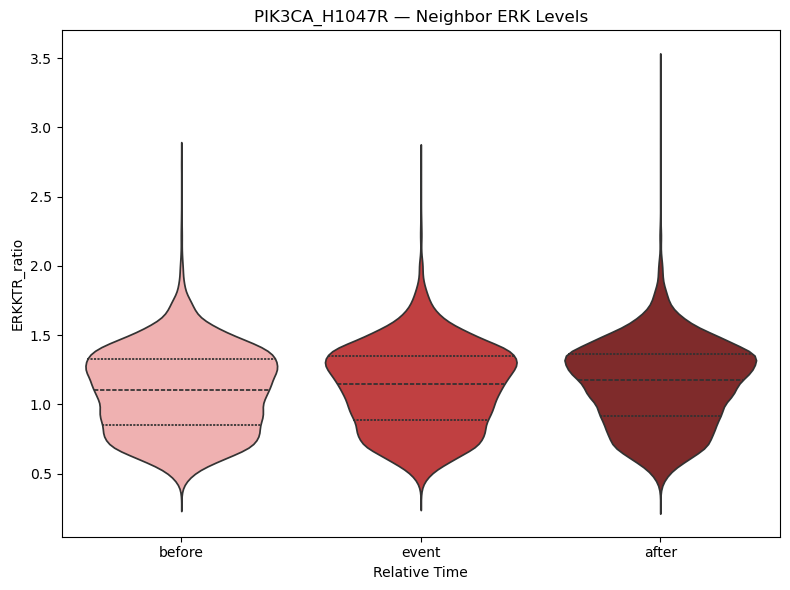

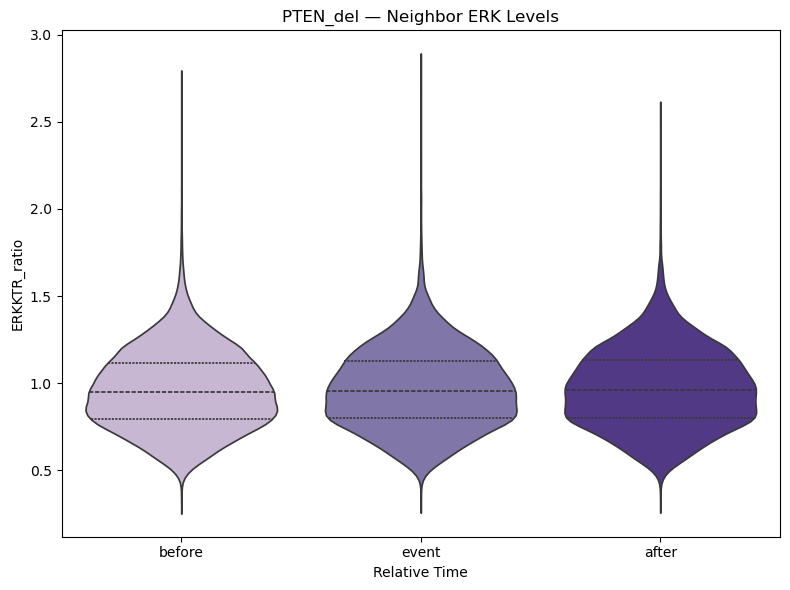

In [229]:

   # order = ['before', 'event', 'after']
mutation_violin_palettes = {
    'WT': sns.color_palette(["#4F81BD", "#1F4E79", "#A6CEE3"]),          # Cool blue shades
    'AKT1_E17K': sns.color_palette(["#F28E2B", "#FFD4A3", "#B45F06"]),    # orange
    'PIK3CA_E545K': sns.color_palette(["#55A868", "#C7E9C0", "#276419"]), # Fresh leafy green
    'PIK3CA_H1047R': sns.color_palette(["#F9A6A6", "#D62728", "#8B1A1A"]),# reds
    'PTEN_del': sns.color_palette(["#CAB2D6", "#7B6BAF", "#4B2991"]),     # Muted purple gradient
}
# 3. Plot each mutation separately
for mutation in mutations:
    df_mut = df2c[df2c['Mutation'] == mutation]
    order = ['before', 'event', 'after']
    palette = mutation_violin_palettes[mutation]

    plt.figure(figsize=(8,6))
    sns.violinplot(
        data=df_mut, x='rel_time', y='ERKKTR_ratio',
        order=order, palette=palette, inner='quartile', hue='rel_time', alpha=0.99
    )
    plt.title(f"{mutation} — Neighbor ERK Levels")
    plt.xlabel("Relative Time")
    plt.ylabel("ERKKTR_ratio")
    plt.tight_layout()
    plt.show()

# Analiza funkcji K Ripley'a

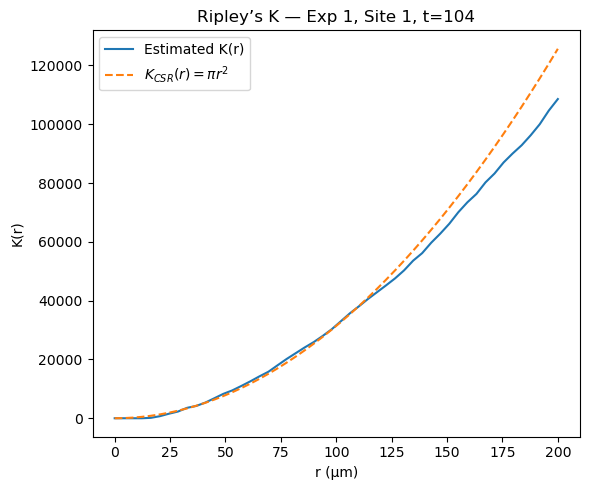

In [21]:
from scipy.spatial.distance import pdist, squareform

# 1) Pick one Exp_ID, Site, and a random Timepoint
exp_id = 1
site   = 1
tp_choices = data[
    (data['Exp_ID']==exp_id) & 
    (data['Image_Metadata_Site']==site)
]['Image_Metadata_T'].unique()
t = np.random.choice(tp_choices)

# 2) Subset active cells at that frame
frame = data[
    (data['Exp_ID']==exp_id) &
    (data['Image_Metadata_Site']==site) &
    (data['Image_Metadata_T']==t) &
    (data['Active'])
]
coords = frame[['objNuclei_Location_Center_X','objNuclei_Location_Center_Y']].to_numpy()
n = len(coords)
if n < 2:
    raise ValueError("Not enough active cells in this frame to compute K(r)")

# 3) Compute all pairwise distances
dists = pdist(coords)              # length n(n-1)/2
D = squareform(dists)              # full n×n matrix

# 4) Define r values
r_max = 200                       # e.g. test up to 200 µm
r_bins = np.linspace(0, r_max, 50)

# 5) Compute K_hat(r) without edge correction
A = 1024**2                       # image area
K_hat = []
for r in r_bins:
    count = np.sum(dists <= r)   # pairs i<j with distance ≤ r
    K = (A / (n*(n-1))) * (2 * count)  # multiply by 2 to count i≠j
    K_hat.append(K)
K_hat = np.array(K_hat)

# 6) Theoretical CSR
K_csr = np.pi * r_bins**2

# 7) Plot
plt.figure(figsize=(6,5))
plt.plot(r_bins, K_hat, label='Estimated K(r)')
plt.plot(r_bins, K_csr, '--', label=r'$K_{CSR}(r)=\pi r^2$')
plt.xlabel('r (µm)')
plt.ylabel('K(r)')
plt.title(f"Ripley’s K — Exp {exp_id}, Site {site}, t={t}")
plt.legend()
plt.tight_layout()
plt.show()

#### Przejście do funkcji L(r) i symulacji Monte Carlo

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Parameters
exp_id = 4
site   = 2
# pick a single frame t as before...
tp_choices = data[
    (data['Exp_ID']==exp_id) & 
    (data['Image_Metadata_Site']==site)
]['Image_Metadata_T'].unique()

t = np.random.choice(tp_choices)
# extract coords_obs of active cells (n points)
frame = data[
    (data['Exp_ID']==exp_id) &
    (data['Image_Metadata_Site']==site) &
    (data['Image_Metadata_T']==t) &
    (data['Active'])
]
coords_obs = frame[['objNuclei_Location_Center_X','objNuclei_Location_Center_Y']].to_numpy()

# radii grid
r_max = 200
r_bins = np.linspace(0, r_max, 50)

# Function to compute L(r) for a coordinate array
def compute_L(coords, r_bins, area):
    n = len(coords)
    d = pdist(coords)
    L = []
    for r in r_bins:
        count = np.sum(d <= r)
        K = (area / (n*(n-1))) * (2*count)
        L.append(np.sqrt(K/np.pi))
    return np.array(L)

# 1) Compute observed L
area = 1024**2
L_obs = compute_L(coords_obs, r_bins, area)

# 2) Monte Carlo simulations
M = 199
L_sims = np.zeros((M, len(r_bins)))
for k in range(M):
    # simulate n CSR points in [0,1024]^2
    sim_coords = np.random.uniform(0, 1024, size=(len(coords_obs), 2))
    L_sims[k] = compute_L(sim_coords, r_bins, area)

# 3) Build 95% envelopes
lower = np.percentile(L_sims, 2.5, axis=0)
upper = np.percentile(L_sims, 97.5, axis=0)
median = np.percentile(L_sims, 50, axis=0)

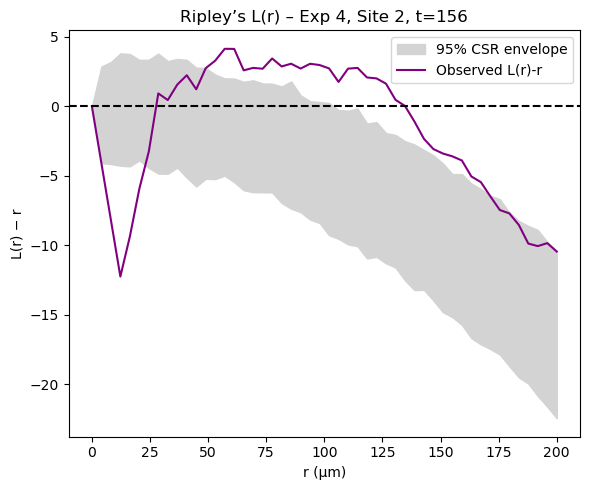

In [158]:
# 4) Plot
plt.figure(figsize=(6,5))
plt.fill_between(r_bins, lower - r_bins, upper - r_bins, color='lightgray', label='95% CSR envelope')
plt.plot(r_bins, L_obs - r_bins, color='purple', label='Observed L(r)-r')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('r (µm)')
plt.ylabel('L(r) − r')
plt.title(f"Ripley’s L(r) – Exp {exp_id}, Site {site}, t={t}")
plt.legend()
plt.tight_layout()
plt.show()
